In [2]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("a9a.txt",n_features=123)
X_val, y_val = load_svmlight_file("a9a_t.txt",n_features=123)
X_train = X_train.toarray()
X_val = X_val.toarray()

In [3]:
import numpy as np

n_samples, n_features = X_train.shape
X_train = np.column_stack((X_train, np.ones((X_train.shape[0], 1))))
y_train = y_train.reshape((-1, 1))
X_val = np.column_stack((X_val, np.ones((X_val.shape[0], 1))))
y_val = y_val.reshape((-1, 1))

In [4]:
# Hinge Loss
def hinge_loss(w,x,y):
    loss = np.maximum(1-y*np.dot(x,w), 0)
    return loss
def loss(w,x,y,C):
    loss = np.sum(np.power(w,2)/2)+C*np.average(hinge_loss(w,x,y))
    return loss

In [5]:
max_epoch = 50
learning_rate = 0.001
C = 0.5
batch_size = 100
max_step = X_train.shape[0]//batch_size

In [6]:
losses_train = []
losses_val = []
# w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
w = np.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution
for epoch in range(max_epoch):
    for step in range(max_step):
        x = X_train[step:step + batch_size]
        y = y_train[step:step + batch_size]
        batch_gw = -y*x*(1-y*np.dot(x,w)>=0)
        gw = np.sum(batch_gw,axis=0)
        grad = w+C*gw.reshape(-1,1)
        w -= learning_rate*grad
    
    train_loss = loss(w,X_train,y_train,C)
    losses_train.append(train_loss)
        
    val_loss = loss(w,X_val,y_val,C)
    losses_val.append(val_loss) 

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_val, np.where(np.dot(X_val, w) > 0, 1, -1),
                            target_names=["positive", "negative"], digits=4))

             precision    recall  f1-score   support

   positive     0.8705    0.9131    0.8913     12435
   negative     0.6664    0.5608    0.6091      3846

avg / total     0.8223    0.8299    0.8246     16281



Text(0.5,1,'The graph of loss value varing with the number of iterations')

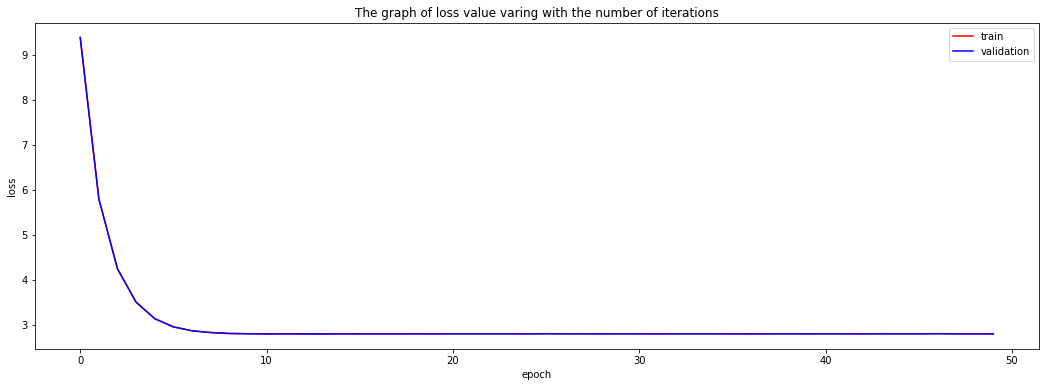

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")